### Summery
<pre>
Author           : Anjana Tiha
Project Name     : Histopathologic Cancer Detection using Convolutional Neural Network, and Transfer Learning.
Description      : 1. Detected Cancer from Histopathologic images by retraining pretrained model “InceptionV3” with                               250000+ images of X-ray (6GB).
                   2. For retraining, removed output layers, freezed first few layers and Fine-tuned model for two new                           label classes (Cancer and Normal).
                   3. Attained testing accuracy 69.55 and loss 1.10.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.3
Last Update      : 12.24.2018
Comments         : Please use Anaconda editor for convenience.
</pre>

#### Code
<pre>
GitHub Link      : <a href=https://github.com/anjanatiha/Histopathologic-Cancer-Detection>Histopathologic Cancer Detection(GitHub)</a>
GitLab Link      : <a href=https://gitlab.com/anjanatiha/Histopathologic-Cancer-Detection>Histopathologic Cancer Detection(GitLab)</a>
Portfolio        : <a href=https://anjanatiha.wixsite.com/website>Anjana Tiha's Portfolio</a>
</pre>

#### Dataset
<pre>
Dataset Name     : Histopathologic Cancer Detection
Dataset Link     : <a href=https://www.kaggle.com/c/histopathologic-cancer-detection>Histopathologic Cancer Detection (Kaggle)</a>
                 : <a href=https://github.com/basveeling/pcam>PatchCamelyon (PCam) (GitHub)</a>
                 : <a href=https://camelyon16.grand-challenge.org/Data>CAMELYON16 challenge Dataset (Original Dataset)</a>
                 
Original Paper   : <a href=https://jamanetwork.com/journals/jama/fullarticle/2665774>Diagnostic Assessment of Deep Learning Algorithms for Detection of Lymph Node Metastases in Women With Breast Cancer</a> 
                   Authors: Babak Ehteshami Bejnordi, Mitko Veta, Paul Johannes van Diest 
                   JAMA (The Journal of the American Medical Association)
                   <cite>
                   Ehteshami Bejnordi B, Veta M, Johannes van Diest P, et al. Diagnostic Assessment of Deep Learning                       Algorithms for Detection of Lymph Node Metastases in Women With Breast Cancer. JAMA.                                    2017;318(22):2199–2210. doi:10.1001/jama.2017.14585
                   </cite>
</pre>

#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0

<!---
#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0
-->

#### Commands / Running Instruction
<pre>
tensorboard --logdir=logs
%config IPCompleter.greedy=True
</pre>

<pre>
<b>Dataset Details</b>
Dataset Name            : Histopathologic Cancer Detection
Number of Class         : 2
Number/Size of Images   : Total      : 220,025 (5.72 Gigabyte (GB))
                          Training   : 132,016 (3.43 Gigabyte (GB))
                          Validation : 44,005  (1.14 Gigabyte (GB))
                          Testing    : 44,004  (1.14 Gigabyte (GB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>Training Parameters</b>
Batch Size              : 32
Number of Epochs        : 20
Training Time           : 1 day and 8 hour (33 Hours)

<b>Output (Prediction/ Recognition / Classification Metrics)</b>
<!--<b>Validation</b>-->
<b>Testing</b>
Accuracy                : 69.55%
Loss                    : 1.10
<!--Precision               : -->
Recall                  : 
<!--Specificity             : -->
</pre>

### Detailed Performance Report
<!--
<pre>
Summary
--------------------------
Loss     : 0.41  
Accuracy : 89.53%

Derived Report
--------------------------
Precision     : 88.37%
Recall        : 95.48%
F1-Score      : 91.79%
        
--------------------------------------------------------------------------------
Report for Model File:  2018-12-15 22-32-00/10-val_acc-0.96-val_loss-0.11.hdf5
--------------------------------------------------------------------------------
              precision    recall  f1-score   support
--------------------------------------------------------------------------------
      Normal       0.91      0.79      0.85       121
   Pneumonia       0.88      0.95      0.92       199
--------------------------------------------------------------------------------
   micro avg       0.89      0.89      0.89       320
   macro avg       0.90      0.87      0.88       320
weighted avg       0.90      0.89      0.89       320
</pre>
>-->

## Import Libraries

In [1]:
import sys
import os
import argparse
from glob import glob

import random
from random import shuffle

import time
import datetime

from collections import Counter

# from numpy.random import seed
# seed(101)
# from tensorflow import set_random_seed
# set_random_seed(101)


import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import itertools


# import inspect
import gc

import re

from PIL import Image
import cv2

import keras

# from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

# from imgaug import augmenters as iaa
# import imgaug as ia


from keras import models
from keras.models import Model
from keras.models import Sequential


from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D


from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input


# from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop

from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy


from keras import backend as K
# K.set_image_dim_ordering('th')


from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Creates directory, if directory exists removes if remove parameter is set to True 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

# Removes directory, if directory exists 
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
        
    return True

def clear_directory(directory_path):
    dirs_files = os.listdir(directory_path)
    
    for item in dirs_files:
#         item_path = os.path.join(directory_path, item)
        item_path = directory_path+ item
        
        try:
            if os.path.exists(item_path):
                shutil.rmtree(item_path)
        except Exception as e:
            print(e)
            
    return True


def remove_empty_folders(path, removeRoot=True):
    if not os.path.isdir(path):
        return
    
    # remove empty subfolders
    files = os.listdir(path)
    
    if len(files):
        for f in files:
            fullpath = os.path.join(path, f)
            
            if os.path.isdir(fullpath):
                remove_empty_folders(fullpath)

    # if folder empty, delete it
    files = os.listdir(path)
    
    if len(files) == 0 and removeRoot:
        print("Removing empty folder:", path)
        os.rmdir(path)
        
        
def dir_file_count(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

In [3]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()  

In [4]:
# prints a integer for degugging
def debug(x):
    print("-"*40, x, "-"*40)  

In [5]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

### Data Visualization Function

In [6]:
def get_reset_subplot_params(nrows, ncols, title=True, dpi=100):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols
    subplot_params["title"] = title

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [7]:
def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        subdir_path = image_dir+"/"+classes[i]
        subdir_files = os.listdir(subdir_path)

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
            subdir_file_path = subdir_path+ "/" + subdir_file_name

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    

def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):
    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = plt.imread(img_filepath)
        
        if subplot_params["title"]:
            plt.title(img_filepath.split("/")[-1])
            
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        
        plt.imshow(img, aspect="auto")
        
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()
    
    
def show_class_sample_images(directory, image_count_per_category=5, ncols=5, title=False, save=False, dpi=100, update_image=False):
    nrows = image_count_per_category//ncols+1 if image_count_per_category%ncols else image_count_per_category//ncols
    
    class_count = len(os.listdir(directory))
    
    print("Number of Class: ", class_count)
    
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=nrows, ncols=ncols, title=title, dpi=dpi)
        
        print("%s%s%s"%("-"*55, name_correct(class_name), "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
        
    print("%s%s%d%s"%("-"*55, "All Class Printed:", class_count, "-"*55))

In [8]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        
        file_count = len(os.listdir(current_directory))
        
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
        
    sns.barplot(x=x, y=y)
    
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

In [9]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    if model:
        try:
            del model
        except:
            return False
    
    tf.reset_default_graph()
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks 
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint = None
    reduce_lr = None
    early_stopping = None
    tensorboard = None
    

### Preprocessing

In [10]:
reset_graph()
reset_callbacks()

In [11]:
# Configure input/ output directory
# Configure training, validation, testing directory

input_directory = r"data/input/"
output_directory = r"data/output/"

training_dir = input_directory + r"train_final"
validation_dir = input_directory + r"validation_final"
testing_dir = input_directory + r"test_final"


figure_directory = "data/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

Number of Class:  2
-------------------------------------------------------Cancer-------------------------------------------------------


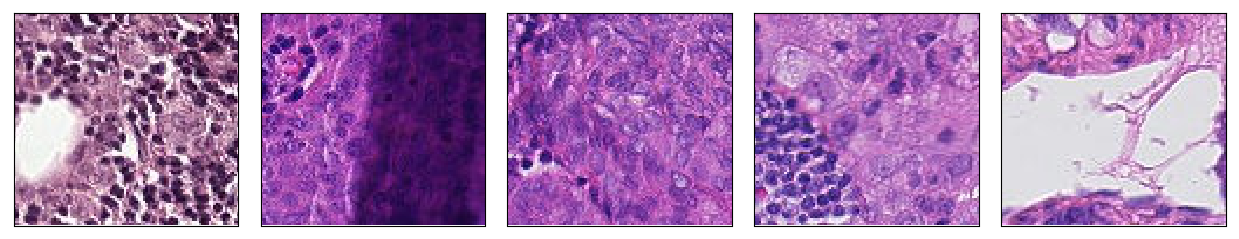


-------------------------------------------------------Normal-------------------------------------------------------


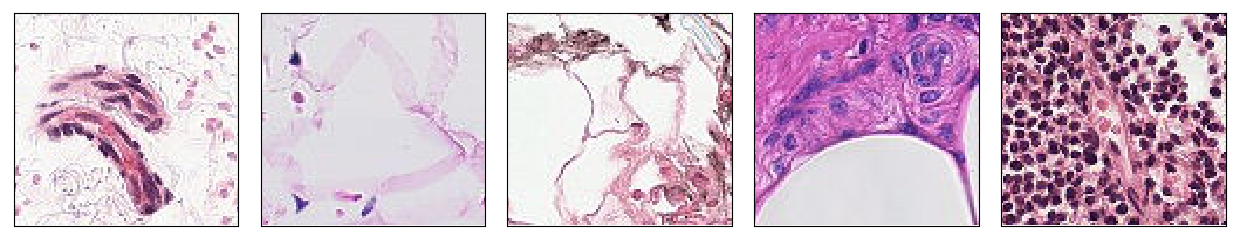


-------------------------------------------------------All Class Printed:2-------------------------------------------------------


In [12]:
show_class_sample_images(training_dir, image_count_per_category=5, ncols=5, title=False, save=False, dpi=100, update_image=False)

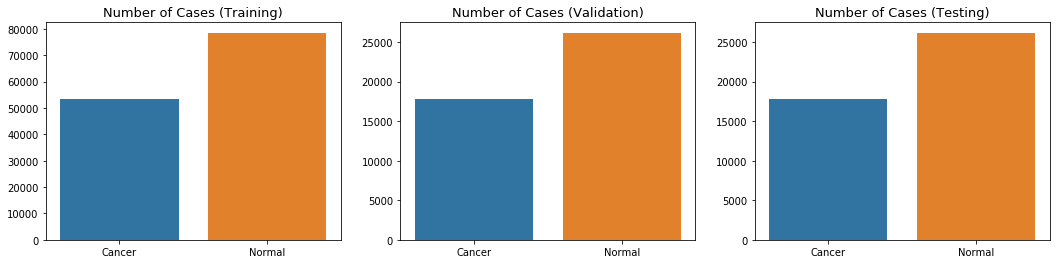

In [13]:
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = "Number of Cases"

plot_params['subplot'] = 131

show_train_val_test(training_dir, validation_dir, testing_dir, plot_params)



### Image Preprocessing/ Augmentation/ Transformation for Training, Validation, Testing and  Dataset 

In [14]:
classes = os.listdir(training_dir)
classes.reverse()
# classes=['Normal', 'Cancer']
# classes = [name_correct(i) for i in classes]
classes

['Normal', 'Cancer']

In [15]:
# class_mode = "binary"
# target_size = (150, 150)
# color_mode = "rgb"


rescale = 1.0/255

# target_size = (299, 299)
target_size = (96, 96)

class_mode = "categorical"

batch_size = 32
train_batch_size = batch_size
val_batch_size = batch_size
test_batch_size = batch_size


train_shuffle = True
val_shuffle = True
test_shuffle = False


train_datagen = ImageDataGenerator(
    rescale=rescale)


train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=train_shuffle)


validation_datagen = ImageDataGenerator(rescale=rescale)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=val_batch_size,
    shuffle=val_shuffle)


test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=test_batch_size,
    shuffle=test_shuffle)

Found 132016 images belonging to 2 classes.
Found 44005 images belonging to 2 classes.
Found 44004 images belonging to 2 classes.


In [16]:
def get_weight(y):
    class_weight_current =  class_weight.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

###  Training Files Configuration

In [17]:
class_weight = get_weight(train_generator.classes)
class_weight

array([0.84038449, 1.23446354])

In [18]:
reset_graph()
reset_callbacks()

In [19]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"


clear_directory(main_log_dir)
remove_empty_folders(main_model_dir, False)


model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

Removing empty folder: data/output/models/2018-12-24 06-11-04


### Callbacks 

In [20]:
print("Settting Callbacks at ", date_time(1))

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)


tensorboard = TensorBoard(
    log_dir=log_dir,
    update_freq='batch')


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1,
    min_lr=0.000000001)

progbar_logger = keras.callbacks.ProgbarLogger(count_mode='steps')

#-----------------------------------------------------------------------------------------------------------------#
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
callbacks = [checkpoint, tensorboard]
#-----------------------------------------------------------------------------------------------------------------#
print("Setted Callbacks at ", date_time(1))

Settting Callbacks at  Timestamp: 2018-12-24 06:21:27
Setted Callbacks at  Timestamp: 2018-12-24 06:21:42


In [21]:
def get_model_classif_nasnet():
    inputs = Input((96, 96, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(96, 96, 3))#, weights=None
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(2, activation="softmax", name="3_")(out)
    model = Model(inputs, out)
    model.summary()

    return model

### Training/Fine-Tuning Base Model-InceptionV3 for Fine-Tuning with New Class Labels

In [22]:
reset_graph()
print("Getting Base Model", date_time(1))
model_nasnet = get_model_classif_nasnet()
print("Got Base Model", date_time(1))

Getting Base Model Timestamp: 2018-12-24 06:21:42
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 3, 3, 1056)   4269716     input_1[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1056)         0           NASNet[1][0]                     
___________________________________________________________

In [23]:
model = model_nasnet

In [ ]:
start_time = time.time()
print("Starting Trainning Model", date_time(1))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# steps_per_epoch = 20
# validation_steps = 5

epochs = 2


loss='categorical_crossentropy'
# metrics=['accuracy']

model.compile(optimizer=Adam(0.0001), loss=loss, metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    verbose=2,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight=class_weight)


elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: "+elapsed_time)
print("Elapsed Time/Epoch: "+elapsed_time/epochs)
print("Completed Model Trainning", date_time(1))

Starting Trainning Model Timestamp: 2018-12-24 06:23:07
Epoch 1/2
 - 4233s - loss: 0.3119 - acc: 0.8758 - val_loss: 0.2763 - val_acc: 0.8946
Epoch 2/2


### Model Performance Visualization over the Epochs

In [ ]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]


plt.figure(figsize=(15, 5))

# Plot training & validation Accuracy values

y1 = history.history['acc']
y2 = history.history['val_acc']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]


plt.subplot(121)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Accuracy', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()

                         
# Plot training & validation loss values
    
y1 = history.history['loss']
y2 = history.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
    
plt.subplot(122)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Loss', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
                         
plt.show()

### Test Saved Models

In [ ]:
dir_name = r"data/output/models/"
dirs = os.listdir(dir_name)
for i in range(len(dirs)):
    print(i, dirs[i])

In [ ]:
cur_dir =dir_name+dirs[2]+"/"
model_names = os.listdir(cur_dir)
for i in range(len(model_names)):
    print(i, model_names[i])

In [ ]:
model_file = cur_dir+model_names[0]

print(model_file)

In [ ]:
model = keras.models.load_model(model_file)

In [ ]:
test_batch_size = 1024
test_shuffle = False

test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    batch_size=test_batch_size,
    shuffle=test_shuffle)

In [ ]:
print("results")
# nsteps = 100
nsteps = len(test_generator)

generator = test_generator

result  = model.evaluate_generator(generator, steps=nsteps, verbose=1)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

In [ ]:
print("results")
# nsteps = 100
nsteps = len(test_generator)
y_pred = model.predict_generator(test_generator, steps=nsteps, verbose=1)  
y_pred = y_pred.argmax(axis=-1)

In [ ]:
y_pred

In [ ]:
# get true labels for a number of batches 
# batch shuffle causes natural index of true labels in generator.classes to be changed
# original = [1,0,1,0,1,0] shuffled = [0,1,0,1,1,0], hence original class order cannot be found from generator.classes
# to stop index class missidentification, batch size of 1 or total sample size can be used in test data generator
def get_true_labels_batch(generator, nsteps=len(generator)):
    y_true = []
    
    for i in range(nsteps):
        img, class_ind = generator[i]
        y_true.append(class_ind.argmax(axis=-1)) 
    
    y_true = [item for sublist in y_true for item in sublist]
    y_true = np.array(y_true)
    
    return y_true

In [ ]:
# nsteps = 100
nsteps = len(test_generator)

y_true = get_true_labels_batch(generator, nsteps=nsteps)

In [ ]:
len(y_true)

In [ ]:
image_file_name_CM = figure_directory+"/CM"

title = model_file.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 
# roc_auc = roc_auc_score(y_true, y_pred)

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("%s%.2f%s"% ("Roc-Auc       : ", roc_auc*100,   "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=11)
fig.savefig(image_file_name_CM, dpi=100)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

In [ ]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = len(y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

### Visualization

In [ ]:
def show_predictions(y_img_batch, y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test_generator.filenames
    m = {}
    length = len(y_true)
    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = cv2.imread(testing_dir+"\\"+ file_names[num], 1)
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')
            

        if plot_params["update_image"] and os.path.exists(image_file_name):
            os.remove(image_file_name)   

        fig.savefig(image_file_name, dpi=subplot_params["dpi"])

    plt.tight_layout()
    plt.show()



### Visualization

In [ ]:
image_file_name_batch = figure_directory+"/result"
image_file_name_sample = figure_directory+"/sample"

batch_size_t = len(y_true_batch)

class_map = {v: k for k, v in test_generator.class_indices.items()}


dpi=100


ncols = 8
# ncols = batch_size_t if batch_size_t<ncols else ncols     
# nrows = batch_size_t/ncols
# nrows = int(batch_size_t/ncols)+1 if batch_size_t%ncols else  int(batch_size_t/ncols)
nrows = 4

count = ncols*nrows


subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()


#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

In [ ]:
show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_batch, count=count, sample=True)

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

In [ ]:
ncols = 4
nrows = 2

if batch_size_t<4:
    cols = 1
    
count = ncols*nrows
    

subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()


show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_sample, count=count, sample=True)

### Reference Kernels
<!--
I found these kernels very helpful:

1. Starter Code Keras (Resnet50) (0.9275 LB)<br>
https://www.kaggle.com/fadhli/starter-code-keras-resnet50-0-9275-lb<br>

2. CNN - How to use 160,000 images without crashing<br>
https://www.kaggle.com/vbookshelf/cnn-how-to-use-160-000-images-without-crashing



Thank you for reading.
-->